In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sales_100k.csv')
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [3]:
print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Deskripsi Statistik Numerik ===")
print(df.describe())

print("\n=== Deskripsi Statistik Kategorikal ===")
print(df.describe(include=['object']))


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB
None

=== Missing Values ===
Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

print("\nTanggal yang gagal diparse:")
print(df[df['Date'].isnull()])

df = df.dropna(subset=['Date'])

print("\nJumlah data duplikat:", df.duplicated().sum())



Tanggal yang gagal diparse:
Empty DataFrame
Columns: [Sale_ID, Date, Customer_ID, Bike_Model, Price, Quantity, Store_Location, Salesperson_ID, Payment_Method, Customer_Age, Customer_Gender]
Index: []

Jumlah data duplikat: 0


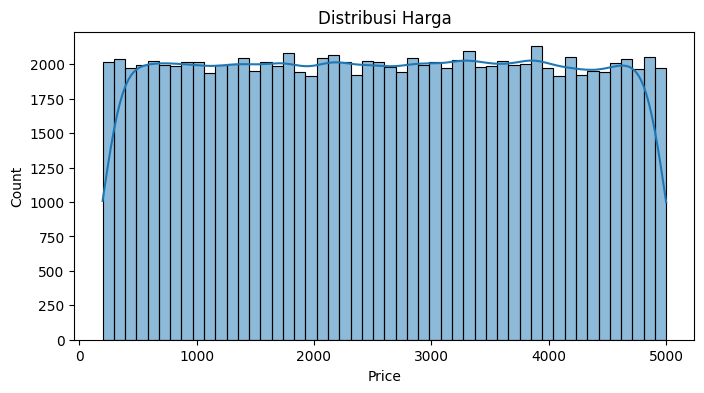

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.show()

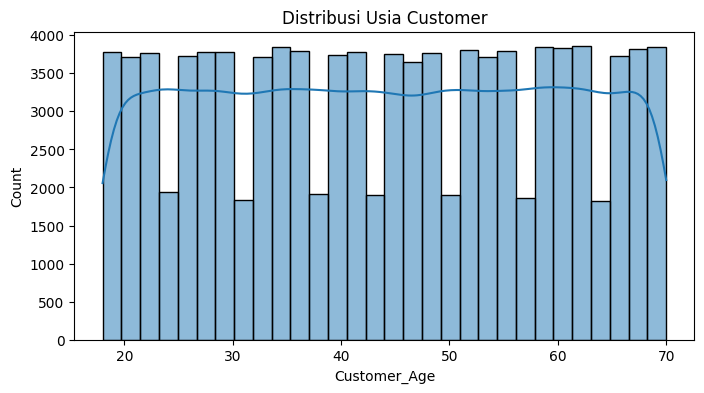

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.show()

In [7]:
print("\nNilai unik Quantity:", df['Quantity'].unique())
print(df.groupby('Payment_Method')['Price'].sum().sort_values(ascending=False))


Nilai unik Quantity: [1 4 3 5 2]
Payment_Method
Apple Pay      43560175.14
Debit Card     43465152.78
Cash           43339432.71
Credit Card    43334315.29
Google Pay     43292139.57
PayPal         42827018.47
Name: Price, dtype: float64


In [8]:
print("\n=== Distribusi Harga ===")
print("Jumlah data  :", len(df['Price']))
print("Nilai minimum:", df['Price'].min())
print("Nilai maksimum:", df['Price'].max())
print("Rata-rata    :", df['Price'].mean())
print("Median       :", df['Price'].median())
print("Standar dev  :", df['Price'].std())
print("\nKuartil:")
print(df['Price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\n=== Distribusi Usia Customer ===")
print("Jumlah data  :", len(df['Customer_Age']))
print("Nilai minimum:", df['Customer_Age'].min())
print("Nilai maksimum:", df['Customer_Age'].max())
print("Rata-rata    :", df['Customer_Age'].mean())
print("Median       :", df['Customer_Age'].median())
print("Standar dev  :", df['Customer_Age'].std())
print("\nKuartil:")
print(df['Customer_Age'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


=== Distribusi Harga ===
Jumlah data  : 100000
Nilai minimum: 200.01
Nilai maksimum: 4999.81
Rata-rata    : 2598.1823396000004
Median       : 2598.575
Standar dev  : 1384.943132758159

Kuartil:
0.25    1399.7875
0.50    2598.5750
0.75    3795.9825
0.90    4521.6910
0.95    4758.7870
0.99    4949.7300
Name: Price, dtype: float64

=== Distribusi Usia Customer ===
Jumlah data  : 100000
Nilai minimum: 18
Nilai maksimum: 70
Rata-rata    : 44.04341
Median       : 44.0
Standar dev  : 15.313760827589247

Kuartil:
0.25    31.0
0.50    44.0
0.75    57.0
0.90    65.0
0.95    68.0
0.99    70.0
Name: Customer_Age, dtype: float64


In [9]:
Q1_age = df['Customer_Age'].quantile(0.25)
Q3_age = df['Customer_Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

outliers_age = df[(df['Customer_Age'] > upper_bound_age) | (df['Customer_Age'] < lower_bound_age)]

print("\n=== Outliers Customer_Age ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_age))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_age) / len(df)))
print("Rentang wajar usia: {:.1f} - {:.1f}".format(lower_bound_age, upper_bound_age))
print("Nilai usia minimum:", df['Customer_Age'].min())
print("Nilai usia maksimum:", df['Customer_Age'].max())

Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty

outliers_qty = df[(df['Quantity'] > upper_bound_qty) | (df['Quantity'] < lower_bound_qty)]

print("\n=== Outliers Quantity ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_qty))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_qty) / len(df)))
print("Rentang wajar Quantity: {:.1f} - {:.1f}".format(lower_bound_qty, upper_bound_qty))
print("Nilai Quantity minimum:", df['Quantity'].min())
print("Nilai Quantity maksimum:", df['Quantity'].max())


=== Outliers Customer_Age ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar usia: -8.0 - 96.0
Nilai usia minimum: 18
Nilai usia maksimum: 70

=== Outliers Quantity ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar Quantity: -1.0 - 7.0
Nilai Quantity minimum: 1
Nilai Quantity maksimum: 5


Creating sample data...
Splitting data...
Preprocessing data...
Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ numeric_input (InputLayer)    │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │             512 │ numeric_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128)               │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ wide_input (InputLayer)       │ (None, 9)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           8,256 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              10 │ wide_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 65)                │               0 │ dense_1[0][0],             │
│                               │                           │                 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 1)                 │              66 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 8,844 (34.55 KB)

 Trainable params: 8,844 (34.55 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4986 - auc: 0.4880 - loss: 0.7002 - val_accuracy: 0.5019 - val_auc: 0.4998 - val_loss: 0.6949
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4834 - auc: 0.4830 - loss: 0.6969 - val_accuracy: 0.4881 - val_auc: 0.4853 - val_loss: 0.6949
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5015 - auc: 0.4992 - loss: 0.6949 - val_accuracy: 0.4869 - val_auc: 0.4851 - val_loss: 0.6953
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5089 - auc: 0.5097 - loss: 0.6941 - val_accuracy: 0.4775 - val_auc: 0.4760 - val_loss: 0.6956
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4930 - auc: 0.5054 - loss: 0.6940 - val_accuracy: 0.4844 - val_auc: 0.4798 - val_loss: 0.6957
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5080 - auc: 0.5209 - loss: 0.6927 - val_accuracy: 0.4913 - val_auc: 0.4816 - val_loss: 0.6957
Epoch 7/300
25/25 ━━━━━━━━

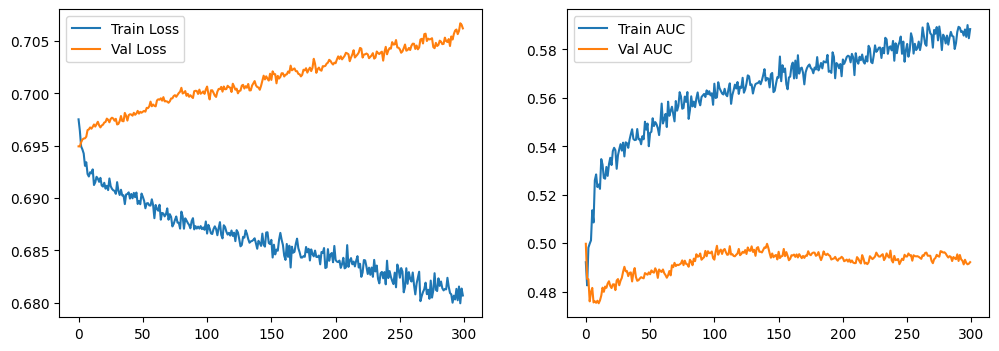

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test AUC: 0.5096


In [10]:
"""
Wide & Deep Learning Pipeline
Complete implementation for binary classification
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import joblib

# Configuration
class Config:
    # Model Architecture
    EMBEDDING_DIM = 4
    DEEP_LAYERS = [128, 64]
    DROPOUT_RATE = 0.3
    
    # Training
    BATCH_SIZE = 256
    EPOCHS = 300
    VALIDATION_SPLIT = 0.2

# Feature definitions
NUMERIC_FEATURES = ['Price', 'Quantity', 'Customer_Age']
CATEGORICAL_FEATURES = ['Payment_Method', 'Store_Location', 'Bike_Model']

def create_sample_data(n_samples=10000):
    """Generate synthetic dataset"""
    np.random.seed(42)
    
    data = {
        'Price': np.random.uniform(100, 2000, n_samples),
        'Quantity': np.random.randint(1, 10, n_samples),
        'Customer_Age': np.random.randint(18, 80, n_samples),
        'Payment_Method': np.random.choice(['Credit Card', 'Cash', 'Debit Card'], n_samples),
        'Store_Location': np.random.choice(['Downtown', 'Mall', 'Suburb'], n_samples),
        'Bike_Model': np.random.choice(['Mountain', 'Road', 'Hybrid'], n_samples),
        'Customer_Gender': np.random.choice(['Male', 'Female'], n_samples)
    }
    
    return pd.DataFrame(data)

def create_preprocessor():
    """Create data preprocessing pipeline"""
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, NUMERIC_FEATURES),
            ('cat', categorical_transformer, CATEGORICAL_FEATURES)
        ])
    
    return preprocessor

def create_wide_deep_model(n_num, n_wide):
    """Build Wide & Deep neural network"""
    # Input layers
    numeric_input = Input(shape=(n_num,), name='numeric_input')
    wide_input = Input(shape=(n_wide,), name='wide_input')
    
    # Deep part
    deep = layers.Dense(128, activation='relu')(numeric_input)
    deep = layers.Dropout(Config.DROPOUT_RATE)(deep)
    deep = layers.Dense(64, activation='relu')(deep)
    
    # Wide part
    wide = layers.Dense(1, activation=None)(wide_input)
    
    # Combine
    combined = layers.Concatenate()([deep, wide])
    output = layers.Dense(1, activation='sigmoid')(combined)
    
    # Create model
    model = models.Model(
        inputs=[numeric_input, wide_input],
        outputs=output
    )
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

def plot_training_history(history):
    """Plot training metrics"""
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Val AUC')
    plt.legend()
    plt.show()

def main():
    # Set random seeds
    tf.random.set_seed(42)
    np.random.seed(42)
    
    # 1. Create sample data
    print("Creating sample data...")
    df = create_sample_data()
    df['target'] = (df['Customer_Gender'] == 'Male').astype(int)
    y = df['target'].values
    X = df.drop(['Customer_Gender', 'target'], axis=1)
    
    # 2. Split data
    print("Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # 3. Create and fit preprocessor
    print("Preprocessing data...")
    preprocessor = create_preprocessor()
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # 4. Get feature dimensions
    n_num = len(NUMERIC_FEATURES)
    n_wide = X_train_processed.shape[1] - n_num
    
    # 5. Split processed data
    X_train_num = X_train_processed[:, :n_num]  # Removed .toarray()
    X_train_wide = X_train_processed[:, n_num:]  # Removed .toarray()
    X_test_num = X_test_processed[:, :n_num]  # Removed .toarray()
    X_test_wide = X_test_processed[:, n_num:]  # Removed .toarray()
    
    # 6. Create model
    print("Building model...")
    model = create_wide_deep_model(n_num, n_wide)
    model.summary()
    
    # 7. Train model
    print("Training model...")
    history = model.fit(
        x={'numeric_input': X_train_num, 'wide_input': X_train_wide},
        y=y_train,
        batch_size=Config.BATCH_SIZE,
        epochs=Config.EPOCHS,
        validation_split=Config.VALIDATION_SPLIT,
        verbose=1
    )
    
    # 8. Evaluate
    print("Evaluating model...")
    plot_training_history(history)
    
    y_pred = model.predict({'numeric_input': X_test_num, 'wide_input': X_test_wide})
    print(f"Test AUC: {roc_auc_score(y_test, y_pred):.4f}")

if __name__ == "__main__":
    main()